In [1]:
import pandas as pd
import pymysql
import mysql.connector

conn=pymysql.connect(
    host="localhost",
    user='root',
    password="bimansql212006",
    database="business_analytics"
)


query="""   
SELECT * FROM sales_data
LIMIT 5;

"""

data=pd.read_sql(query,conn)
display(data)

C:\Users\BIMAN\AppData\Local\Temp\ipykernel_10104\824466149.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data=pd.read_sql(query,conn)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Revenue,Buy_Price
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,523.9200,220.0464
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2195.8200,512.3580
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,29.2400,7.7486
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,4787.8875,1340.6085
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,44.7360,19.8516


## TOTAL REVENUE OF THE COMPANY

In [2]:
query1=""" 

SELECT 
SUM(Revenue) AS Total_Revenue
 FROM sales_data;


"""

Company_revenue=pd.read_sql(query1,conn)
display(Company_revenue)

C:\Users\BIMAN\AppData\Local\Temp\ipykernel_10104\1128002195.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Company_revenue=pd.read_sql(query1,conn)


,Total_Revenue
0,1.137004e+07


## TOTAL PROFIT OF THE COMPANY

In [3]:
query2="""   
SELECT 
SUM(Profit) AS Total_Profit
FROM sales_data;

"""

Company_Profit=pd.read_sql(query2,conn)
display(Company_Profit)

C:\Users\BIMAN\AppData\Local\Temp\ipykernel_10104\974016940.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Company_Profit=pd.read_sql(query2,conn)


,Total_Profit
0,282857.7542


## PROFIT MARGIN OF THE COMPANY

In [4]:
query3="""

SELECT 
((SUM(Profit)/SUM(Revenue))*100) AS Profit_Margin
FROM sales_data;


"""

Profit_margin_company=pd.read_sql(query3, conn)
display(Profit_margin_company,"%")

C:\Users\BIMAN\AppData\Local\Temp\ipykernel_10104\2220187485.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Profit_margin_company=pd.read_sql(query3, conn)


,Profit_Margin
0,2.487746


'%'

## SALES TREND OF THE COMPANY

In [5]:
query4="""   
SELECT 
YEAR(STR_TO_DATE(`Order Date`, '%m/%d/%Y')) AS year,
MONTH(STR_TO_DATE(`Order Date`, '%m/%d/%Y')) AS month,
SUM(Revenue) AS Total_sales

FROM sales_data
GROUP BY year,month
ORDER BY year, month
;

"""

Sales_trend_company=pd.read_sql(query4, conn)
display(Sales_trend_company)

C:\Users\BIMAN\AppData\Local\Temp\ipykernel_10104\3071765626.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Sales_trend_company=pd.read_sql(query4, conn)


,year,month,Total_sales
0,2014,1,73520.3710
1,2014,2,18335.8440
2,2014,3,291845.5630
3,2014,4,145318.9970
4,2014,5,117499.6990
5,2014,6,170458.8924
6,2014,7,156327.3910
7,2014,8,136093.1595
8,2014,9,416252.5016
9,2014,10,158891.1830


In [6]:
!pip install matplotlib


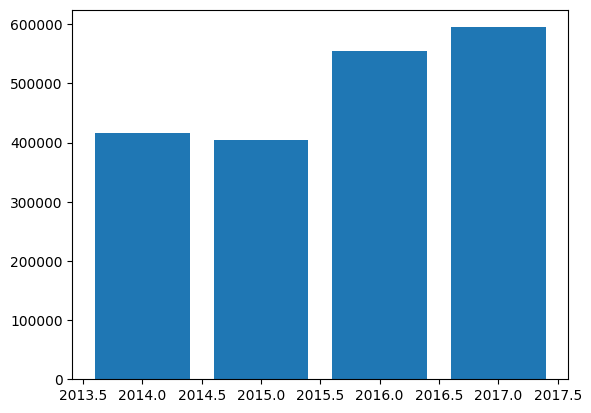

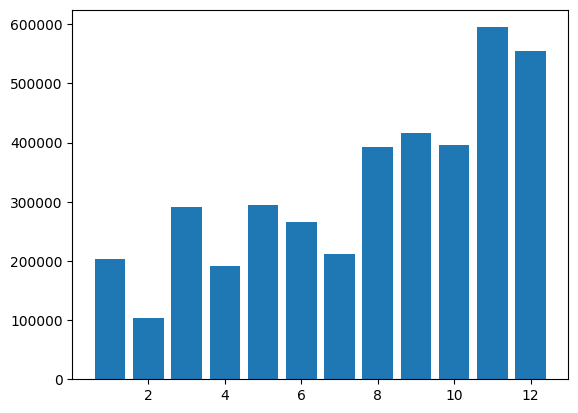

In [7]:
import matplotlib.pyplot as plt

plt.bar(Sales_trend_company["year"], Sales_trend_company["Total_sales"])
plt.show()

plt.bar(Sales_trend_company["month"], Sales_trend_company["Total_sales"])
plt.show()

## INSIGHTS :- WE CLEARLY SEE FROM THE VISUALIZATION THE SALES IS INCREASING OVER THE TIME

## TOP 10 PRODUCT BY SALES

In [16]:
query5="""   
SELECT `Product ID`, `Category`, `Sub-Category`, `Product Name`,

SUM(Sales)
FROM sales_data
GROUP BY `Product ID`, `Category`, `Sub-Category`, `Product Name`
ORDER BY SUM(Sales) DESC
LIMIT 10;


"""

Top_10_Product_sales=pd.read_sql(query5,conn)
display(Top_10_Product_sales)

C:\Users\BIMAN\AppData\Local\Temp\ipykernel_10104\301003107.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Top_10_Product_sales=pd.read_sql(query5,conn)


,Product ID,Category,Sub-Category,Product Name,SUM(Sales)
0,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,61599.824
1,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
2,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480
3,FUR-CH-10002024,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,21870.576
4,OFF-BI-10001359,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,19823.479
5,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
6,TEC-CO-10001449,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,18839.686
7,TEC-MA-10001127,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
8,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,17965.068
9,OFF-SU-10000151,Office Supplies,Supplies,High Speed Automatic Electric Letter Opener,17030.312


In [18]:
query6="""   
SELECT `Product ID`, `Category`, `Sub-Category`, `Product Name`,

SUM(Profit) AS profit
FROM sales_data
GROUP BY `Product ID`, `Category`, `Sub-Category`, `Product Name`
ORDER BY SUM(Profit) DESC
LIMIT 10;


"""

Top_10_Product_profit=pd.read_sql(query6,conn)
display(Top_10_Product_profit)

C:\Users\BIMAN\AppData\Local\Temp\ipykernel_10104\2441785436.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Top_10_Product_profit=pd.read_sql(query6,conn)


,Product ID,Category,Sub-Category,Product Name,profit
0,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,25199.9280
1,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.0390
2,TEC-CO-10001449,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,6983.8836
3,TEC-CO-10003763,Technology,Copiers,Canon PC1060 Personal Laser Copier,4570.9347
4,TEC-MA-10001127,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,4094.9766
5,TEC-MA-10003979,Technology,Machines,Ativa V4110MDD Micro-Cut Shredder,3772.9461
6,TEC-MA-10001047,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714
7,TEC-AC-10002049,Technology,Accessories,Plantronics Savi W720 Multi-Device Wireless He...,3696.2820
8,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,3345.2823
9,TEC-MA-10000045,Technology,Machines,Zebra ZM400 Thermal Label Printer,3343.5360


## LOW SALES BUT HIGH PROFIT PRODUCTS

In [21]:
query7="""   
SELECT `Product ID`, `Category`, `Sub-Category`, `Product Name`,

SUM(Sales) AS Total_Sales,
SUM(Profit) AS Total_profit
FROM sales_data
GROUP BY `Product ID`, `Category`, `Sub-Category`, `Product Name`



"""

Low_Sales_High_Profit=pd.read_sql(query7,conn)
display(Low_Sales_High_Profit.head())

C:\Users\BIMAN\AppData\Local\Temp\ipykernel_10104\3430015308.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Low_Sales_High_Profit=pd.read_sql(query7,conn)


,Product ID,Category,Sub-Category,Product Name,Total_Sales,Total_profit
0,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,1263.957,-56.3214
1,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",10637.528,1927.4420
2,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,153.510,64.4011
3,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,7242.768,-532.7613
4,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,301.968,63.7488


In [25]:
avg_sales=Low_Sales_High_Profit["Total_Sales"].mean()
avg_profit=Low_Sales_High_Profit["Total_profit"].mean()
avg_profit,avg_sales

(np.float64(153.56012714440823), np.float64(1233.6861326275787))